In [1]:
# 2 - In ‘coffee_dataset.csv’ dataset
# There’s a Hypothesis Says That ..People Who are older
# than or equal 21 Drinks coffee More Than Who Are
# Younger.
# Test This Hypothesis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("coffee_dataset.csv")

In [4]:
data.head()

,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [5]:
data = data.drop_duplicates(subset = 'user_id',keep= 'first')

# Hypothesis #
## Null Hypothesis: People who are older than or equal 21 Drink less coffee than who are younger than 21 ##
#### Null Hypothesis: older_than_or_equal - younger <= 0
## Alternative Hypothesis: People who are older than or equal 21 Drink more coffee than who are younger than 21 ##
#### Atlernative Hypothesis: older_than_or_equal - younger > 0

# Observable Difference # 

In [6]:
older_than = data.query("drinks_coffee and age == '>=21'")
older_than.head()

,user_id,age,drinks_coffee,height
1,1864,>=21,True,65.824249
3,7875,>=21,True,68.569404
6,4996,>=21,True,70.828455
9,2368,>=21,True,66.208656
11,6103,>=21,True,68.905686


In [7]:
younger_than = data.query("drinks_coffee and age == '<21'")
younger_than.head()

,user_id,age,drinks_coffee,height
4,6254,<21,True,64.020226
12,1861,<21,True,62.646820
27,3071,<21,True,64.741701
38,4646,<21,True,63.564051
41,3805,<21,True,63.791531


In [8]:
obs_difference = older_than.shape[0] - younger_than.shape[0]
obs_difference

1232

In [9]:
difference = []
for _ in range(2000):
    sample = data.sample(data.shape[0],replace = True)
    older_than = sample.query("drinks_coffee and age == '>=21'")
    younger_than = sample.query("drinks_coffee and age == '<21'")
    difference.append(older_than.shape[0] - younger_than.shape[0])

(array([  3.,  23.,  93., 262., 473., 493., 419., 172.,  53.,   9.]),
 array([1104. , 1128.3, 1152.6, 1176.9, 1201.2, 1225.5, 1249.8, 1274.1,
        1298.4, 1322.7, 1347. ]),
 <BarContainer object of 10 artists>)

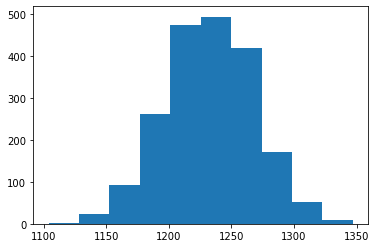

In [10]:
plt.hist(difference)

# Create Null population #

(array([  1.,  12.,  61., 213., 442., 551., 429., 214.,  61.,  16.]),
 array([-139.28942321, -114.1039129 ,  -88.91840259,  -63.73289228,
         -38.54738197,  -13.36187166,   11.82363865,   37.00914896,
          62.19465927,   87.38016958,  112.5656799 ]),
 <BarContainer object of 10 artists>)

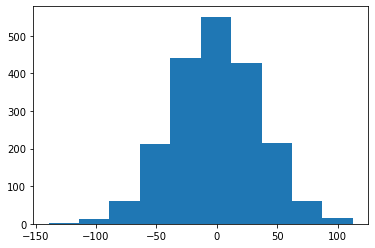

In [11]:
difference = np.array(difference)
normal = np.random.normal(0,difference.std(),difference.shape[0])
plt.hist(normal)

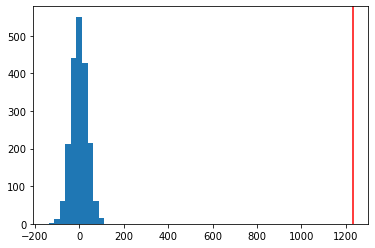

In [12]:
plt.hist(normal)
plt.axvline(obs_difference, c= 'red')

In [13]:
(normal>obs_difference).mean()

0.0

# Conclusion: Null Hypothesis Rejected, status changed #
#### People who are older than or equal 21 Drink more coffee than who are younger than 21 ####